# **IMAGE PREPROCESSING**


**MOUNTING THE DRIVE**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORT THE IMAGEDATAGENERATOR LIBRARY**

In [2]:
from keras.preprocessing.image import ImageDataGenerator

**CONFIGURE IMAGEDATAGENERATOR CLASS**

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)


test_datagen=ImageDataGenerator(rescale=1./255)







**APPLY IMAGE DATAGENERATOR FUNCTIONALITY TO TRAINSET AND TESTSET**

In [4]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/TRAIN_SET',(64,64),batch_size=5,color_mode='rgb',class_mode='sparse')
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/TEST_SET',(64,64),batch_size=5,color_mode='rgb',class_mode='sparse')

Found 2626 images belonging to 5 classes.
Found 1055 images belonging to 5 classes.


In [5]:
print(x_train.class_indices)

print(x_test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}
{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [6]:
from collections import Counter as c
c(x_train.labels)

Counter({0: 606, 1: 445, 2: 479, 3: 621, 4: 475})

# **MODEL BUILDING**

**IMPORTING THE MODEL BUILDING LIBRARIES**



In [7]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator

**INITIALIZING THE MODEL**

In [8]:
model=Sequential()
classifier=Sequential()

**ADDING CNN LAYERS**

In [9]:
classifer=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())

**ADDING DENSE LAYERS**

In [10]:
classifier.add(Dense(units=128,activation='relu'))
classifer.add(Dense(units=5,activation='softmax'))

In [11]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)              

**CONFIGURE THE LEARNING PROCESS**

In [12]:
classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**TRAIN THE MODEL**

In [20]:
classifier.fit_generator(generator=x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_train))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
526/526 [==============================] - ETA: 0s - loss: 4.8565 - accuracy: 0.2300

526/526 [==============================] - 1304s 2s/step - loss: 4.8565 - accuracy: 0.2300 - val_loss: 4.8520 - val_accuracy: 0.1488
Epoch 2/10
526/526 [==============================] - 27s 50ms/step - loss: 4.8520 - accuracy: 0.2308
Epoch 3/10
526/526 [==============================] - 27s 51ms/step - loss: 4.8520 - accuracy: 0.2308
Epoch 4/10
526/526 [==============================] - 29s 54ms/step - loss: 4.8777 - accuracy: 0.2304
Epoch 5/10
526/526 [==============================] - 26s 49ms/step - loss: 4.8556 - accuracy: 0.2304
Epoch 6/10
526/526 [==============================] - 28s 54ms/step - loss: 4.8520 - accuracy: 0.2308
Epoch 7/10
526/526 [==============================] - 26s 50ms/step - loss: 4.8520 - accuracy: 0.2308
Epoch 8/10
526/526 [==============================] - 26s 49ms/step - loss: 4.8520 - accuracy: 0.2308
Epoch 9/10
526/526 [==============================] - 26s 49ms/step - loss: 4.8548 - accuracy: 0.2304
Epoch 10/10
526/526 [==============================

**SAVE THE MODEL**

In [21]:
classifier.save('nutrition_analyzer.h5')

**TEST THE MODEL**

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array 
from keras.preprocessing import image
model=load_model("nutrition_analyzer.h5")

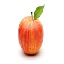

In [40]:
img=tensorflow.keras.utils.load_img("/content/drive/MyDrive/Dataset/tests/app_test2.jfif",target_size=(64,64))
img

In [42]:
img=tensorflow.keras.utils.load_img(r"/content/drive/MyDrive/Dataset/tests/ora_test1.jfif",grayscale=False,target_size=(64,64))
from tensorflow.keras.utils import load_img, img_to_array 
x=img_to_array(img)
x=np.expand_dims(x,axis=0)
#pred=model.predict_classes(x)
#pred = model.predict(x) 
#pred

preds=model.predict(x) 
val=np.argmax(preds)
index=['APPLES','BANANA','ORANGE','PINEAPPLE','WATERMELON']
val
print(str(index[val]))

1/1 [==============================] - 0s 25ms/step
APPLES
